In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score

import scipy.stats as stats

from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.layers import Embedding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Using TensorFlow backend.


In [39]:
print(tf.__version__)

2.3.1


Tensorflow 2.3.1V
 extra info: [link](https://www.sciencedirect.com/science/article/pii/S2352340918315191)


In [ ]:
data = pd.read_csv('../data_sets/hotel_bookings.csv')
data = data.drop('company', axis = 1)
data = data.drop('reservation_status_date', axis = 1)

data

### Prep the data
We gaan kijken of we kunnen voorspellen wanneer hun afspraak cancelle </br>
Voor dat de data gebruikt kan worden moet een worden schoon gemaakt!

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

kijken in welken collomn data missed

In [5]:
for i in data.columns:
    if data[i].isnull().values.any() == True:
        print(i)

children
country
agent


In [6]:
data['children'].value_counts()
data['children'].isnull().sum() # kan ook wel bij 0 want is toch bijna niks
data['children'] = data['children'].fillna(0)
data['children'].isnull().sum()
data['country'].isnull().sum() #is bijna niks kan wel bij PRT
data['country'] = data['country'].fillna('PRT')
#data['country'] = data['country'].replace('nan','PRT')
data['country'].value_counts()
data['agent']
data['agent'].isnull().sum()
data['agent'].value_counts()
data['agent'].median()

14.0

In [7]:
data['agent'] = data['agent'].fillna(338)
data['agent']
#heb besloten om er een nieuwe groep van te maken om dat het er zo veel zijn

0         338.0
1         338.0
2         338.0
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64

In [8]:
data['agent'].value_counts()

9.0      31961
338.0    16340
240.0    13922
1.0       7191
14.0      3640
         ...  
117.0        1
480.0        1
352.0        1
158.0        1
472.0        1
Name: agent, Length: 334, dtype: int64

In [9]:
for i in data.columns:
    if data[i].isnull().values.any() == True:
        print(i)

In [10]:
for i in data.columns:
    teller = len(pd.unique(data[i]))
    print(i,'aantal unique',teller)
    if teller == 2:
        print(pd.unique(data[i]))

hotel aantal unique 2
['Resort Hotel' 'City Hotel']
is_canceled aantal unique 2
[0 1]
lead_time aantal unique 479
arrival_date_year aantal unique 3
arrival_date_month aantal unique 12
arrival_date_week_number aantal unique 53
arrival_date_day_of_month aantal unique 31
stays_in_weekend_nights aantal unique 17
stays_in_week_nights aantal unique 35
adults aantal unique 14
children aantal unique 5
babies aantal unique 5
meal aantal unique 5
country aantal unique 177
market_segment aantal unique 8
distribution_channel aantal unique 5
is_repeated_guest aantal unique 2
[0 1]
previous_cancellations aantal unique 15
previous_bookings_not_canceled aantal unique 73
reserved_room_type aantal unique 10
assigned_room_type aantal unique 12
booking_changes aantal unique 21
deposit_type aantal unique 3
agent aantal unique 334
days_in_waiting_list aantal unique 128
customer_type aantal unique 4
adr aantal unique 8879
required_car_parking_spaces aantal unique 5
total_of_special_requests aantal unique 6
r

In [11]:
data['hotel']= pd.factorize(data.hotel)[0]

In [12]:
object_data = ['arrival_date_month','meal','country','market_segment','distribution_channel',
               'reserved_room_type','assigned_room_type',
               'deposit_type','customer_type','reservation_status']
# list van gemaakt want is denk ik een soort van makelijk

In [13]:
for i in object_data:
    teller = len(pd.unique(data[i]))
    print(i,'aantal unique',teller)
    print(pd.unique(data[i]))

arrival_date_month aantal unique 12
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal aantal unique 5
['BB' 'FB' 'HB' 'SC' 'Undefined']
country aantal unique 177
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA

In [14]:
data['reservation_status']= pd.factorize(data.reservation_status)[0]
data['customer_type']= pd.factorize(data.customer_type)[0]
data['deposit_type']= pd.factorize(data.deposit_type)[0]
data['reserved_room_type ']= pd.factorize(data.reserved_room_type )[0]
data['assigned_room_type ']= pd.factorize(data.assigned_room_type )[0]
data['country']= pd.factorize(data.country)[0]

In [15]:
data['market_segment'].value_counts()
# Undefined komt bijna niet voor

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [16]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [17]:
data['distribution_channel'].value_counts()
#defined komt bijna niet voor

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [18]:
data['arrival_date_month'] = data['arrival_date_month'].map({'July':7, 'August':8,
                                                               'September':9,
                                                               'October':10, 'November':11,
                                                               'December':12, 'January':1,
                                                               'February':2, 'March':3,
                                                               'April':4, 'May':5, 'June':6})
data['arrival_date_month'].value_counts()

8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64

In [19]:
data['distribution_channel'] = data['distribution_channel'].replace('Undefined','TA/TO')
data['distribution_channel'].value_counts()

TA/TO        97875
Direct       14645
Corporate     6677
GDS            193
Name: distribution_channel, dtype: int64

In [20]:
data['meal'] = data['meal'].replace('Undefined','BB')
data['meal'].value_counts()

BB    93479
HB    14463
SC    10650
FB      798
Name: meal, dtype: int64

In [21]:
data['market_segment'] = data['market_segment'].replace('Undefined','Online TA')
data['market_segment'].value_counts()

Online TA        56479
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

nu alles factorize als we willen beginnen

In [22]:
data['reserved_room_type']= pd.factorize(data. reserved_room_type)[0]
data['assigned_room_type']= pd.factorize(data. assigned_room_type)[0]
data['meal']= pd.factorize(data. assigned_room_type)[0]
data['market_segment']= pd.factorize(data. assigned_room_type)[0]
data['distribution_channel']= pd.factorize(data. assigned_room_type)[0]

### Deeplearning

Het besten resotaat was The accuracy of the Forest_all is 0.9002010218611274.<br/>
Dus kijken of we een beter nn kunnen maken.

nu met niet all de data om dat overfiting

In [23]:
X = data[['deposit_type','lead_time','total_of_special_requests'
              ,'required_car_parking_spaces','booking_changes','hotel']]
X.shape

#target vector y
y = data['is_canceled']
y.shape

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(95512, 6) (95512,)
(23878, 6) (23878,)


In [24]:
x_val_set = train_X[:10000]
y_val_set = train_y[:10000]

In [25]:
# De waarden in X_train zijn erg verschillend, een neuraal netwerk verwacht waarden rond 0
val_X = train_X.values
min_max_scaler = MinMaxScaler()
nn_train_X = min_max_scaler.fit_transform(val_X)

# Keras verwacht een matrix (array van array's) als output:
nn_train_y = train_y.values.reshape(-1,1)
nn_test_y = test_y.values.reshape(-1,1)

encoder = OneHotEncoder(sparse=False)
nn_train_y = encoder.fit_transform(nn_train_y)
nn_test_y = encoder.transform(nn_test_y)

print(train_y[:10])

nn_test_X = test_X.values
nn_test_X = min_max_scaler.fit_transform(nn_test_X)

# Om te zorgen dat we de sigmoid activatie kunnen gebruiken moeten we de data reschapen
nn_train_y = np.asarray(train_y).astype('float32').reshape((-1,1))
nn_test_y = np.asarray(test_y).astype('float32').reshape((-1,1))

67702     1
115851    0
57345     1
11622     1
33333     0
50838     0
2240      0
114316    0
23343     0
85245     0
Name: is_canceled, dtype: int64


In [26]:
# simple nn
nn_model = Sequential()
nn_model.add(Dense(30, activation = "relu", input_shape = (nn_train_X.shape[1], )))
nn_model.add(Dense(20, activation = "relu"))
nn_model.add(Dense(10, activation = "relu"))
nn_model.add(Dense(1, activation = "sigmoid"))

In [27]:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
nn_model.summary()
history = nn_model.fit(nn_train_X, nn_train_y,
                       epochs = 20,
                       batch_size = 32,
                       validation_data = (x_val_set, y_val_set),
                       shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
2985/2985 [==============================] - 3s 977us/step - loss: 0.4895 - accuracy: 0.7538 - val_loss: 42.0141 - val_accuracy: 0.6270

In [28]:
nn_loss, nn_acc = nn_model.evaluate(nn_test_X, nn_test_y)
print(nn_acc)

747/747 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.7589

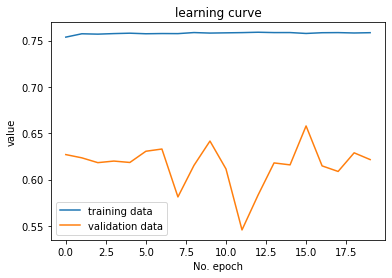

In [29]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [30]:
nn_model = Sequential()
nn_model.add(Dense(64, activation = "relu", input_shape = (nn_train_X.shape[1], )))
nn_model.add(Dropout(0.5, noise_shape=None, seed=None))
nn_model.add(Dense(64, activation = "relu"))
nn_model.add(Dropout(0.5, noise_shape=None, seed=None))
nn_model.add(Dense(10, activation = "relu"))
nn_model.add(Dense(1, activation = "sigmoid"))
#add drop over komen van overfiting

In [31]:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
nn_model.summary()
history = nn_model.fit(nn_train_X, nn_train_y,
                       epochs = 20,
                       batch_size = 32,
                       validation_data = (x_val_set, y_val_set),
                        shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                448       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 5,269
Trainable params: 5,269
Non-trainable params: 0
____________________________________________________

In [32]:
nn_loss, nn_acc = nn_model.evaluate(nn_test_X, nn_test_y)
print(nn_acc)

747/747 [==============================] - 1s 988us/step - loss: 0.4574 - accuracy: 0.7584

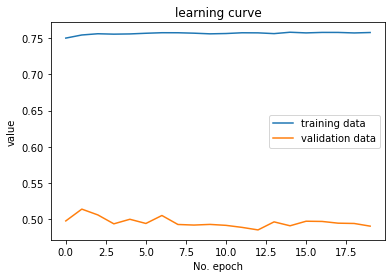

In [33]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

overfiting dus ff kijk

In [34]:
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D

nn_model = Sequential()
nn_model.add(Embedding(10000, 64, input_length=6))
nn_model.add(Dropout(0.25))
nn_model.add(Conv1D(64,
                 5,
                 padding='valid',
                 activation='relu',
                 strides=1))
nn_model.add(MaxPooling1D(pool_size=2))
nn_model.add(LSTM(70))
nn_model.add(Dense(1, activation = "sigmoid"))

In [35]:
nn_model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
nn_model.summary()
history = nn_model.fit(nn_train_X, nn_train_y,
                       epochs = 20,
                       batch_size = 32,
                       validation_data = (x_val_set,
                                          y_val_set))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 6, 64)             640000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 2, 64)             20544     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1, 64)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 70)                37800     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 71        
Total params: 698,415
Trainable params: 698,415
Non-trainable params: 0
________________________________________________

In [36]:
nn_loss, nn_acc = nn_model.evaluate(nn_test_X, nn_test_y)
print(nn_acc)

747/747 [==============================] - 1s 2ms/step - loss: 0.5253 - accuracy: 0.7491

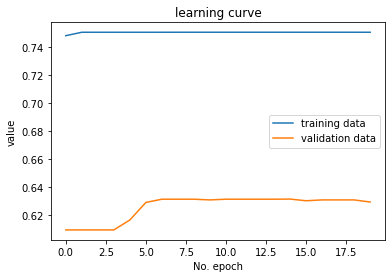

In [37]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('learning curve')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

Dit model het het misten last van overfiting maar nog steet zeker last er van.